In [10]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Train'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Test'

In [2]:
import os
import shutil
import glob
import random

CATEGORIES=['mango','grape','strawberry']

for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 40)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(validation_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [3]:
for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 80)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(test_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [7]:
import cv2
import os

resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

CATEGORIES_TRAIN_DIR=['mango','grape','strawberry']
CATEGORIES_VALIDATION_DIR=['mango','grape','strawberry']
CATEGORIES_TEST_DIR=['mango','grape','strawberry']

for category in CATEGORIES_TRAIN_DIR:
    src_path=os.path.join(train_dir,category)
    dest_path = os.path.join(resized_images_100_100_train_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [8]:
for category in CATEGORIES_VALIDATION_DIR:
    src_path=os.path.join(validation_dir,category)
    dest_path = os.path.join(resized_images_100_100_validation_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [9]:
for category in CATEGORIES_TEST_DIR:
    src_path=os.path.join(test_dir,category)
    dest_path = os.path.join(resized_images_100_100_test_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [13]:
from tensorflow.python.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [14]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [15]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [16]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

filepath="VGG16_Indus_Fruits_7_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                147488    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 14,862,407
Trainable params: 14,862,407
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [18]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [7]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
175/175 [==============================] - 56s 321ms/step - loss: 1.5837 - categorical_accuracy: 0.4046 - val_loss: 0.9163 - val_categorical_accuracy: 0.7107
Epoch 2/200
175/175 [==============================] - 36s 204ms/step - loss: 1.0151 - categorical_accuracy: 0.6732 - val_loss: 0.8827 - val_categorical_accuracy: 0.7286
Epoch 3/200
175/175 [==============================] - 36s 206ms/step - loss: 0.7102 - categorical_accuracy: 0.7832 - val_loss: 0.5760 - val_categorical_accuracy: 0.8286
Epoch 4/200
175/175 [==============================] - 35s 202ms/step - loss: 0.5794 - categorical_accuracy: 0.8314 - val_loss: 0.6288 - val_categorical_accuracy: 0.8286
Epoch 5/200
175/175 [==============================] - 36s 207ms/step - loss: 0.5614 - categorical_accuracy: 0.8396 - val_loss: 0.3672 - val_categorical_accuracy: 0.8929
Epoch 6/200
175/175 [==============================] - 36s 205ms/step - loss: 0.4906 - categorical_acc

175/175 [==============================] - 30s 173ms/step - loss: 0.1374 - categorical_accuracy: 0.9636 - val_loss: 0.4661 - val_categorical_accuracy: 0.8857
Epoch 31/200
175/175 [==============================] - 30s 173ms/step - loss: 0.1573 - categorical_accuracy: 0.9629 - val_loss: 0.1717 - val_categorical_accuracy: 0.9536
Epoch 32/200
175/175 [==============================] - 30s 173ms/step - loss: 0.1267 - categorical_accuracy: 0.9704 - val_loss: 0.2246 - val_categorical_accuracy: 0.9429
Epoch 33/200
175/175 [==============================] - 31s 176ms/step - loss: 0.1204 - categorical_accuracy: 0.9721 - val_loss: 0.2211 - val_categorical_accuracy: 0.9393
Epoch 34/200
175/175 [==============================] - 30s 171ms/step - loss: 0.1414 - categorical_accuracy: 0.9696 - val_loss: 0.1807 - val_categorical_accuracy: 0.9429
Epoch 35/200
175/175 [==============================] - 30s 171ms/step - loss: 0.1478 - categorical_accuracy: 0.9650 - val_loss: 0.2794 - val_categorical_accu

Epoch 60/200
175/175 [==============================] - 31s 175ms/step - loss: 0.0739 - categorical_accuracy: 0.9821 - val_loss: 0.2415 - val_categorical_accuracy: 0.9393
Epoch 61/200
175/175 [==============================] - 31s 176ms/step - loss: 0.0966 - categorical_accuracy: 0.9750 - val_loss: 0.1886 - val_categorical_accuracy: 0.9500
Epoch 62/200
175/175 [==============================] - 31s 175ms/step - loss: 0.0886 - categorical_accuracy: 0.9796 - val_loss: 0.2963 - val_categorical_accuracy: 0.9143
Epoch 63/200
175/175 [==============================] - 30s 172ms/step - loss: 0.0415 - categorical_accuracy: 0.9914 - val_loss: 0.1825 - val_categorical_accuracy: 0.9536
Epoch 64/200
175/175 [==============================] - 30s 173ms/step - loss: 0.0780 - categorical_accuracy: 0.9832 - val_loss: 0.1625 - val_categorical_accuracy: 0.9607
Epoch 65/200
175/175 [==============================] - 30s 173ms/step - loss: 0.0688 - categorical_accuracy: 0.9854 - val_loss: 0.3405 - val_cat

175/175 [==============================] - 30s 174ms/step - loss: 0.0414 - categorical_accuracy: 0.9918 - val_loss: 0.3922 - val_categorical_accuracy: 0.9071
Epoch 121/200
175/175 [==============================] - 30s 173ms/step - loss: 0.0418 - categorical_accuracy: 0.9914 - val_loss: 0.2251 - val_categorical_accuracy: 0.9643
Epoch 122/200
175/175 [==============================] - 30s 173ms/step - loss: 0.0433 - categorical_accuracy: 0.9907 - val_loss: 0.1912 - val_categorical_accuracy: 0.9679
Epoch 123/200
175/175 [==============================] - 30s 174ms/step - loss: 0.0722 - categorical_accuracy: 0.9829 - val_loss: 0.2343 - val_categorical_accuracy: 0.9571
Epoch 124/200
175/175 [==============================] - 30s 173ms/step - loss: 0.0536 - categorical_accuracy: 0.9843 - val_loss: 0.1839 - val_categorical_accuracy: 0.9607
Epoch 125/200
175/175 [==============================] - 30s 172ms/step - loss: 0.0320 - categorical_accuracy: 0.9932 - val_loss: 0.2835 - val_categorical

175/175 [==============================] - 30s 169ms/step - loss: 0.0166 - categorical_accuracy: 0.9957 - val_loss: 0.2730 - val_categorical_accuracy: 0.9571
Epoch 181/200
175/175 [==============================] - 30s 169ms/step - loss: 0.0176 - categorical_accuracy: 0.9968 - val_loss: 0.1547 - val_categorical_accuracy: 0.9679
Epoch 182/200
175/175 [==============================] - 30s 169ms/step - loss: 0.0300 - categorical_accuracy: 0.9964 - val_loss: 0.4136 - val_categorical_accuracy: 0.9250
Epoch 183/200
175/175 [==============================] - 30s 169ms/step - loss: 0.0666 - categorical_accuracy: 0.9836 - val_loss: 0.3168 - val_categorical_accuracy: 0.9357
Epoch 184/200
175/175 [==============================] - 30s 169ms/step - loss: 0.0528 - categorical_accuracy: 0.9900 - val_loss: 0.3702 - val_categorical_accuracy: 0.9464
Epoch 185/200
175/175 [==============================] - 30s 169ms/step - loss: 0.0155 - categorical_accuracy: 0.9971 - val_loss: 0.3001 - val_categorical

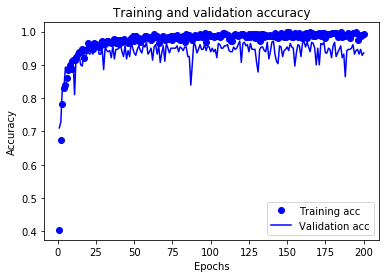

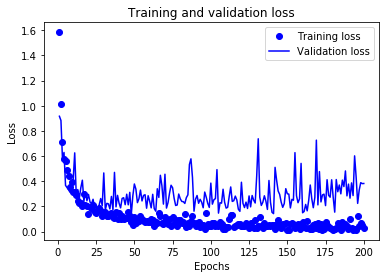

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG16_Indus_Fruits_7_classes_100_100_1st Experiment.h5')

In [20]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 6s 161ms/step - loss: 0.2428 - categorical_accuracy: 0.9500
Test-set accuracy: 95.00%


In [21]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [22]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 3s 5ms/sample - loss: 0.2428 - categorical_accuracy: 0.9500
Loss on test set:  0.24283739448125874
Accuracy on test set:  0.95


In [23]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 2s 4ms/sample
(560, 1)
(560, 1)


<Figure size 432x288 with 0 Axes>

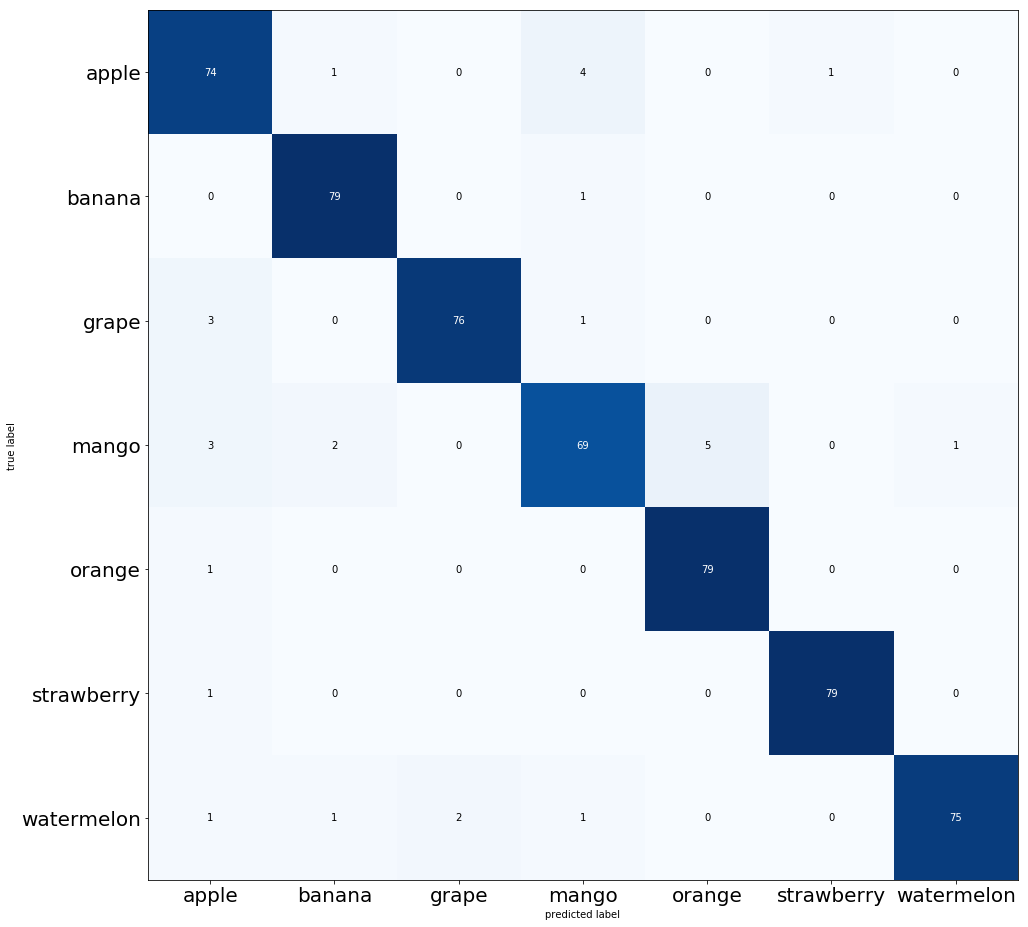

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(16,16), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=20)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=20)
plt.show()